***Question 1.***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget "www.cs.umn.edu/~sjguy/data/WhiteWine.txt"

URL transformed to HTTPS due to an HSTS policy
--2023-10-29 01:24:26--  https://www.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www.cs.umn.edu (www.cs.umn.edu)... 104.18.20.107, 104.18.21.107, 2606:4700::6812:156b, ...
Connecting to www.cs.umn.edu (www.cs.umn.edu)|104.18.20.107|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-10-29 01:24:27--  http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cs.umn.edu (www-users.cs.umn.edu)... 134.84.66.195
Connecting to www-users.cs.umn.edu (www-users.cs.umn.edu)|134.84.66.195|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-10-29 01:24:28--  https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cse.umn.edu (www-users.cse.umn.edu)... 134.84.66.195
Connecting to www-users.cse

In [ ]:
data = pd.read_csv('WhiteWine.txt')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**Part a.**

<Axes: title={'center': 'Distribution of Wine Quality Ratings'}, xlabel='quality', ylabel='count'>

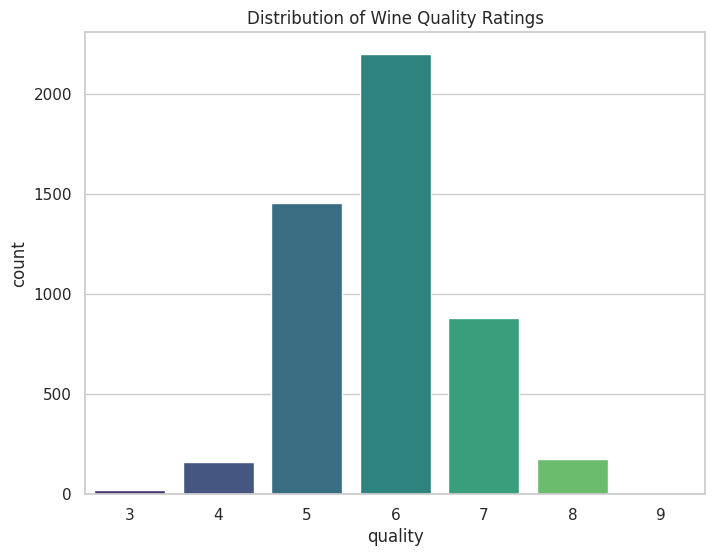

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality Rating")
plt.ylabel("Count")
sns.countplot(x='quality', data=data, palette='viridis')

 - The rating in the histogram seems to be somewhat normally distributed (approximate bell curve structure).

- Ratings of 5, 6 and 7 seems to be the most common ratings in our dataset.

- Personally I believe that ratings follow this distribution because most people rate mediocarlly. Wine quality ratings are typically assigned by experts or wine connoisseurs who are trained to evaluate wine based on specific characteristics. If these experts follow standardized rating criteria, it could result in a more uniform distribution
- Impacts to our predictions:
 - Our accuracy measure might be misleading because of imbalanced data **distribution**
 - We'll have to resort to other complex measures like recall, precision and F1 score for our analysis of data.

**Part b.**

<Axes: title={'center': 'Distribution of Alcohol Content'}, xlabel='Alcohol Content', ylabel='Count'>

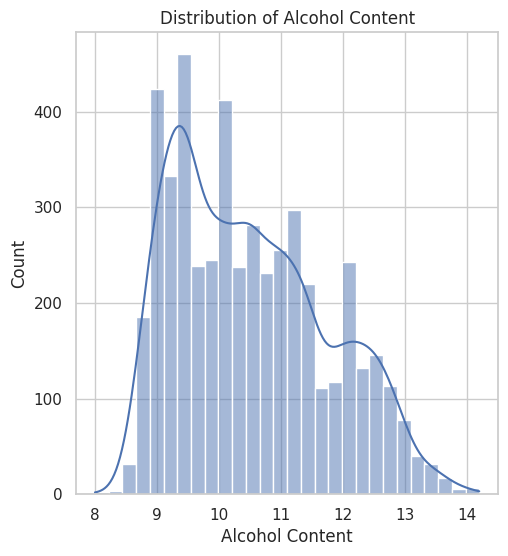

In [ ]:
# Create a dense histogram plot for alcohol content
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Distribution of Alcohol Content")
plt.xlabel("Alcohol Content")
plt.ylabel("Count")
sns.histplot(data=data, x='alcohol', kde=True)

<Axes: title={'center': 'Distribution of Wine Density'}, xlabel='Density', ylabel='Count'>

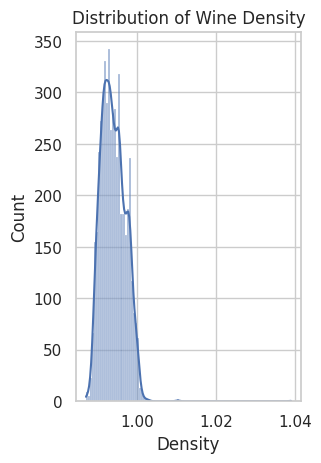

In [ ]:
# Create a dense histogram plot for wine density
plt.subplot(1, 2, 2)
plt.title("Distribution of Wine Density")
plt.xlabel("Density")
plt.ylabel("Count")
sns.histplot(data=data, x='density', kde=True)

**Description of these plots :**
- First of all, yes these plots make sense
- In terms of alcohol content, people prefer low to medium alcohol content in wine hence the histogram
- In terms of density, with wine tasting I've seen that low denisty wine is preferred hence that histogram makes sense as well

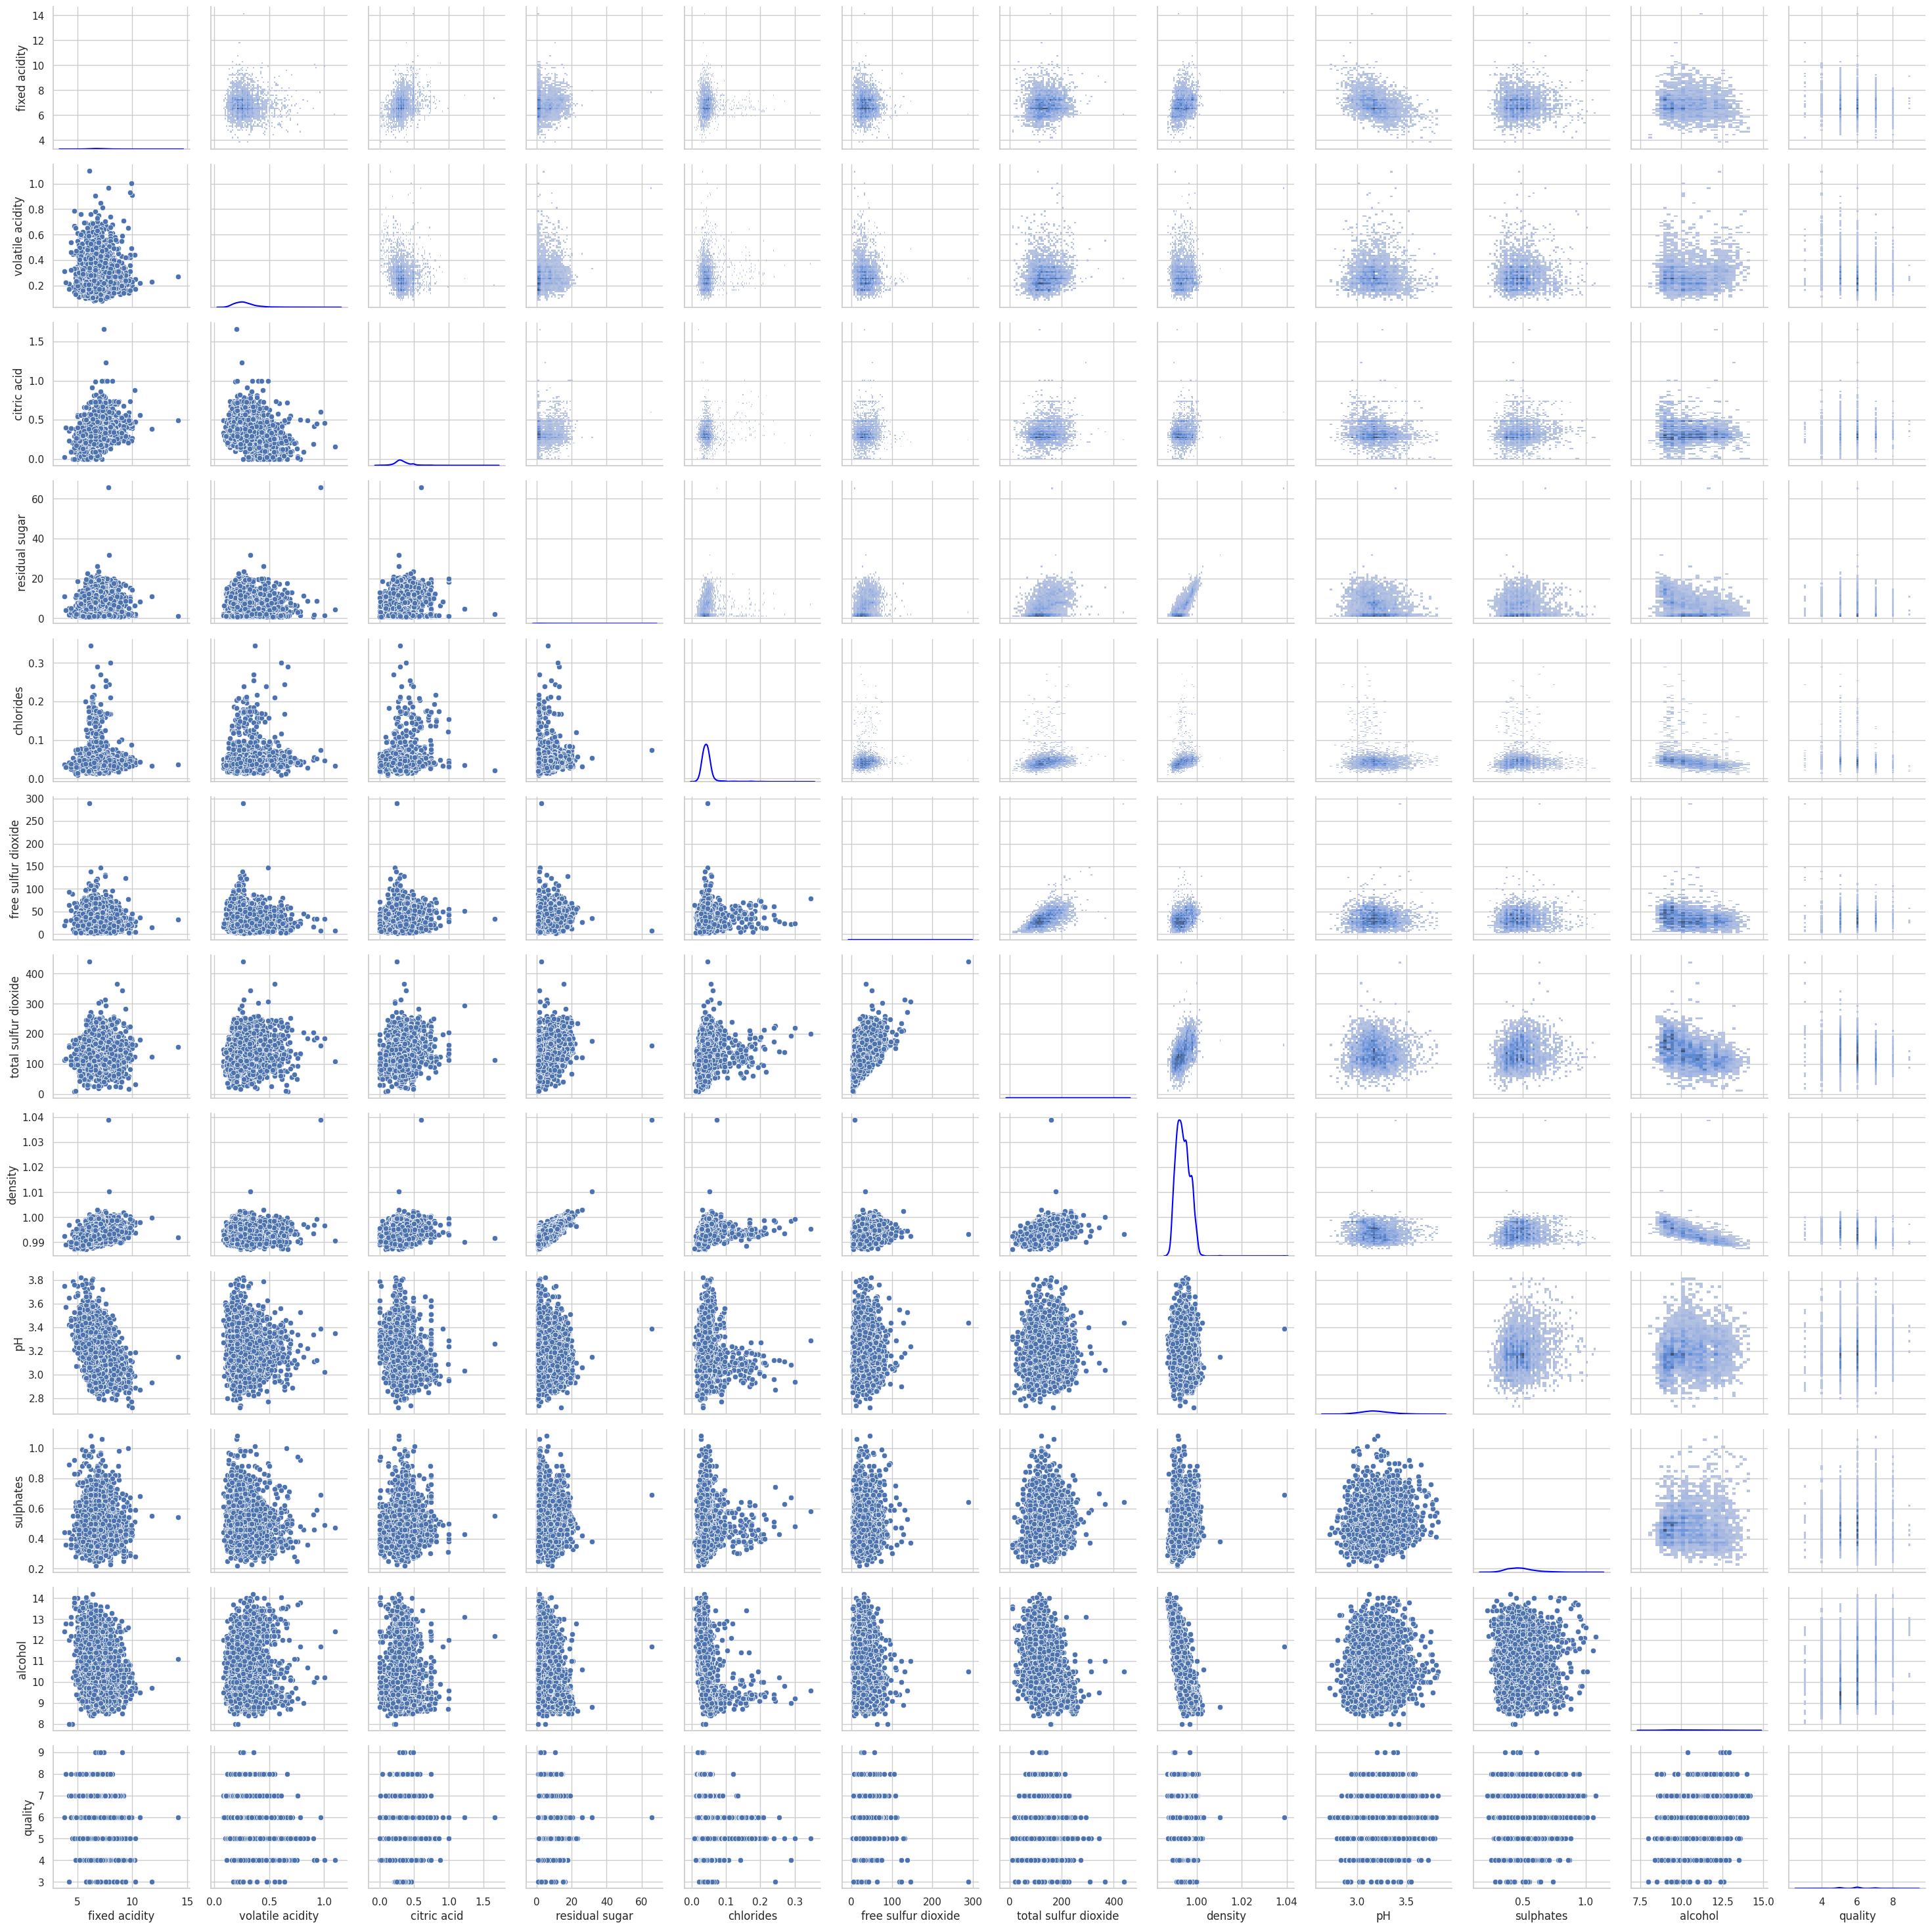

In [ ]:
# Assuming you have a DataFrame named 'wine_data' with multiple features
sns.set(style="whitegrid")
g = sns.PairGrid(data)
g.map_upper(sns.histplot, kde=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, color="blue")

plt.show()

**Relationship between alcohol content and density :**
- There seems to be an inverse relationship between these two factors i.e. similar to x = 1/y.
- This could be due to several resons such as climate, ripeness, etc.

**Part c.**

In [ ]:
# Assuming you have a DataFrame named 'wine_data' with all the features
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

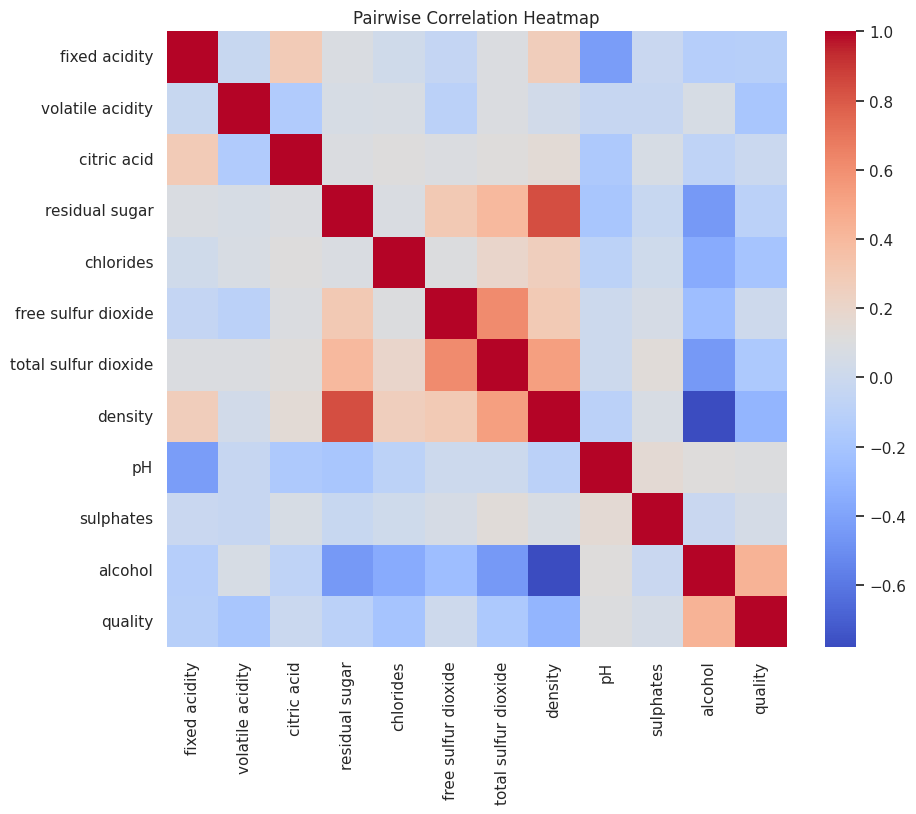

In [ ]:
# Assuming you have already computed the correlation matrix
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, cmap="coolwarm",)

plt.title("Pairwise Correlation Heatmap")
plt.show()

**Trends from heatmap :**
- Alcohol impacts quality of wine
- density does not have significant impact on quality of wine
- pH, citric acid and free sulphur dioxide have low to medim effcts on qulaity

To summarze, to make good quality wine; alcohol content, citric acid and free sulhur dioxide can play crucial role.

***Ques 2.***

In [ ]:
import torch
import math

In [ ]:
def gradDec(model, n_params, x, y, lr=0.01, n_epochs=2000, print_rate=200):

  params = 0.1*torch.rand(n_params).float() #Random inital paramaters
  params.requires_grad = True

  for epoch in range(n_epochs):
    y_pred = model(params, x)
    loss_tenor = (y_pred - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_()
    if epoch%print_rate==0:
      print("epoch:",epoch,"loss=",loss.item())

  return params

In [ ]:
features=["alcohol", "density","citric acid","free sulfur dioxide"]
x = torch.Tensor(data[features].values)
y = torch.Tensor(data["quality"].values)

In [ ]:
x_mean = x.mean(dim=0)
x_norm = (x-x_mean)/x_mean
x_norm

tensor([[-1.6304e-01,  7.0144e-03,  7.7227e-02,  2.7450e-01],
        [-9.6466e-02, -2.7643e-05,  1.7381e-02, -6.0349e-01],
        [-3.9401e-02,  1.0790e-03,  1.9692e-01, -1.5034e-01],
        ...,
        [-1.0598e-01, -1.4964e-03, -4.3146e-01, -1.5034e-01],
        [ 2.1739e-01, -5.3695e-03, -1.0231e-01, -4.3356e-01],
        [ 1.2228e-01, -4.6453e-03,  1.3707e-01, -3.7691e-01]])

In [ ]:
y_mean = y.mean(dim=0)
y_norm = (y-y_mean)/y_mean

**Part a.**

In [ ]:
def linearModel(params, inputs):
  y_pred = params[0] * inputs[:,0] + params[1]
  return y_pred

In [ ]:
linear = gradDec(linearModel,2,x_norm,y_norm,lr=0.1)

epoch: 0 loss= 0.02141892910003662
epoch: 200 loss= 0.01939578354358673
epoch: 400 loss= 0.01872655563056469
epoch: 600 loss= 0.01850316673517227
epoch: 800 loss= 0.01842859759926796
epoch: 1000 loss= 0.018403705209493637
epoch: 1200 loss= 0.018395397812128067
epoch: 1400 loss= 0.018392624333500862
epoch: 1600 loss= 0.018391698598861694
epoch: 1800 loss= 0.018391389399766922


In [ ]:
y_predictions_linear = linearModel(linear, x_norm)
y_predictions_linear = (y_predictions_linear * y_mean) + y_mean
y_predictions_linear

tensor([5.3424, 5.5611, 5.7485,  ..., 5.5298, 6.5919, 6.2796],
       grad_fn=<AddBackward0>)

<Axes: title={'center': 'Prediction Errors for Each Model'}, xlabel='Quality', ylabel='Prediction Quality'>

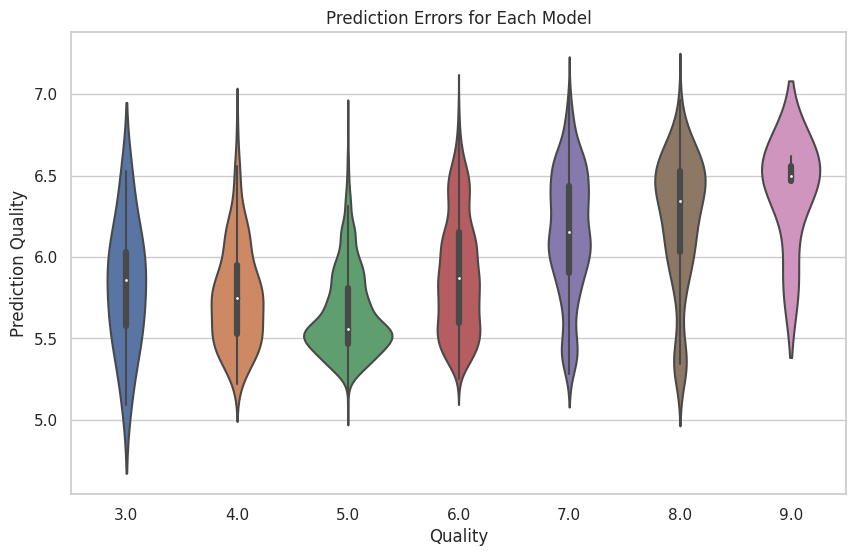

In [ ]:
# Create a violin plot
# da = data['alcohol'].values * x.std() + x_mean
plt.figure(figsize=(10, 6))
plt.title("Prediction Errors for Each Model")
plt.xlabel("Quality")
plt.ylabel("Predicted Quality")
x_plot = y.detach().numpy()
y_plot = y_predictions_linear.detach().numpy()
sns.violinplot(x=x_plot, y=y_plot)

**Analysis**
- Parameters = takes in normalized features and quality scores with an learning rate of 0.1 working great.
- Normalization - I normalized my input parameters using mean values
- Un-normalized equation = gradDec(linearModel,2,x,y,lr=0.1)
- Prediction - I'm able to reduce my loss significantly (0.018) and further accuracy analysis will be done in later parts.

**Part b.**

In [ ]:
def multiLinearModel(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]
  return y_pred

In [ ]:
multi_linear = gradDec(multiLinearModel,4,x_norm,y_norm  ,0.5, n_epochs=350, print_rate=30)
multi_linear

epoch: 0 loss= 0.028567371889948845
epoch: 30 loss= 0.02006659284234047
epoch: 60 loss= 0.019119760021567345
epoch: 90 loss= 0.018703769892454147
epoch: 120 loss= 0.01852099411189556
epoch: 150 loss= 0.01844068616628647
epoch: 180 loss= 0.01840539649128914
epoch: 210 loss= 0.018389884382486343
epoch: 240 loss= 0.01838306523859501
epoch: 270 loss= 0.01838005892932415
epoch: 300 loss= 0.018378732725977898
epoch: 330 loss= 0.01837814599275589


tensor([5.5912e-01, 2.3469e-02, 9.8120e-03, 7.7038e-08], requires_grad=True)

In [ ]:
y_predictions_mlinear = multiLinearModel(multi_linear, x_norm)
y_predictions_mlinear = (y_predictions_mlinear * y_mean) + y_mean
y_predictions_mlinear

tensor([5.3475, 5.5619, 5.7599,  ..., 5.5045, 6.5857, 6.2871],
       grad_fn=<AddBackward0>)

<Axes: title={'center': 'Prediction Errors for Each Model'}, xlabel='Quality', ylabel='Predicted Quality'>

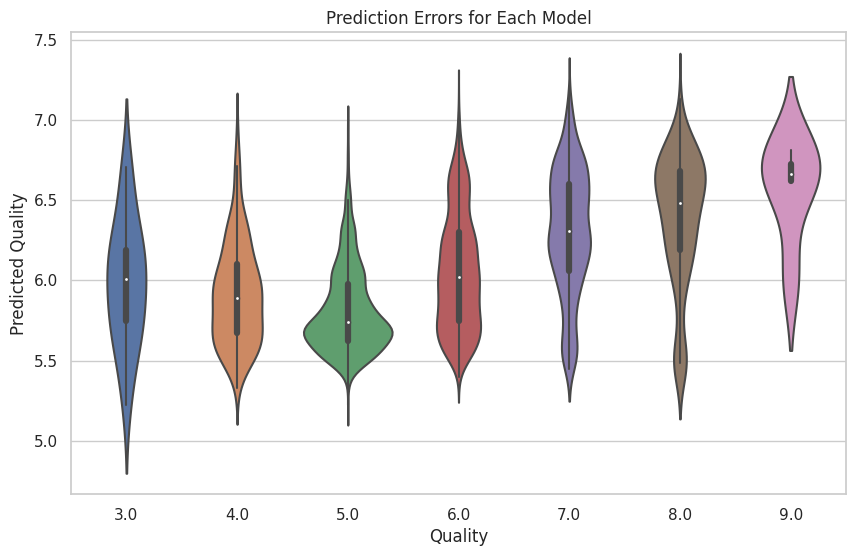

In [ ]:
# Create a violin plot
# da = data['alcohol'].values * x.std() + x_mean
plt.figure(figsize=(10, 6))
plt.title("Prediction Errors for Each Model")
plt.xlabel("Quality")
plt.ylabel("Predicted Quality")
x_plot = y.detach().numpy()
y_plot = y_predictions_mlinear.detach().numpy()
sns.violinplot(x=x_plot, y=y_plot)

**Analysis**
- Parameters = takes in normalized features and quality scores with an learning rate of 0.5 working great.
- Normalization - I normalized my input parameters using z-score normalization
- Un-normalized equation = gradDec(multiLinearModel, 4, x, y, 0.5,n_epochs=350, print_rate=30)
- Prediction - I'm able to reduce my loss significantly (0.018) and further accuracy analysis will be done in later parts.

**Part c.**

In [ ]:
def multiLinearModel_withInteraction(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*(inputs[:,0]*inputs[:,1]) + params[3]
  return y_pred

In [ ]:
multi_linear_int = gradDec(multiLinearModel_withInteraction,4,x_norm,y_norm,0.7,600,50)
multi_linear_int

epoch: 0 loss= 0.02779904007911682
epoch: 50 loss= 0.018989352509379387
epoch: 100 loss= 0.018475845456123352
epoch: 150 loss= 0.018401794135570526
epoch: 200 loss= 0.018391091376543045
epoch: 250 loss= 0.018389519304037094
epoch: 300 loss= 0.0183892659842968
epoch: 350 loss= 0.018389202654361725
epoch: 400 loss= 0.01838916540145874
epoch: 450 loss= 0.018389131873846054
epoch: 500 loss= 0.018389098346233368
epoch: 550 loss= 0.01838906668126583


tensor([5.6275e-01, 9.9303e-02, 7.5783e-02, 2.0907e-05], requires_grad=True)

In [ ]:
y_predictions_mlinear_pram = multiLinearModel(multi_linear, x_norm)
y_predictions_mlinear_pram = (y_predictions_mlinear_pram * y_mean) + y_mean
y_predictions_mlinear_pram

tensor([5.3475, 5.5619, 5.7599,  ..., 5.5045, 6.5857, 6.2871],
       grad_fn=<AddBackward0>)

<Axes: title={'center': 'Prediction Errors for Each Model'}, xlabel='Quality', ylabel='Predicted Quality'>

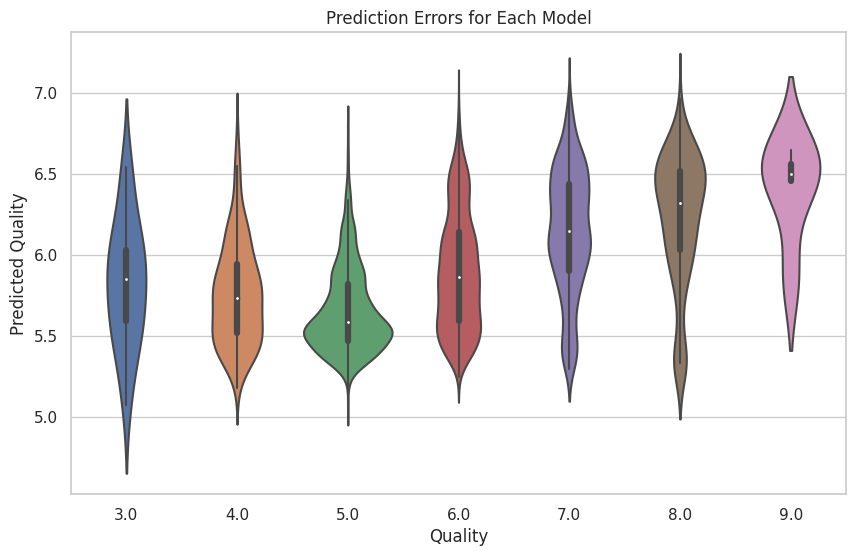

In [ ]:
# Create a violin plot
# da = data['alcohol'].values * x.std() + x_mean
plt.figure(figsize=(10, 6))
plt.title("Prediction Errors for Each Model")
plt.xlabel("Quality")
plt.ylabel("Predicted Quality")
x_plot = y.detach().numpy()
y_plot = y_predictions_mlinear_pram.detach().numpy()
sns.violinplot(x=x_plot, y=y_plot)

**Analysis**
- Parameters = takes in normalized features and quality scores with an learning rate of 0.7 working great.
- Normalization - I normalized my input parameters using z-score normalization
- Un-normalized equation = gradDec(multiLinearModel_withInteraction,4,x,y,0.7,600,50)
- Prediction - I'm able to reduce my loss significantly (0.018) and further accuracy analysis will be done in later parts.

***Ques 3.***

In [ ]:
def thresholded_accuracy(model, params, x, y, threshold):
    """
    Calculate the accuracy of a model's predictions based on a threshold.

    Args:
    - model: The model used for predictions.
    - params: The model's parameters.
    - x: Input data.
    - y: Actual target values.
    - threshold: Threshold for considering predictions as correct.

    Returns:
    - accuracy: Accuracy of the model's predictions.
    """
    correct_predictions = 0
    total_predictions = x.shape[0]  # Get the number of data points

    for i in range(total_predictions):
        input_data = x[i, :].unsqueeze(0)
        y_pred = model(params, input_data)  # Make a prediction for each data point
        prediction_difference = torch.abs(y_pred - y[i])

        if torch.all(prediction_difference <= threshold):
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy



**Linear model analysis :**

In [ ]:
# T = 0.25
thresholded_accuracy(linearModel, linear, x, y, 0.25)

0.2564311964066966

In [ ]:
# T = 0.5
thresholded_accuracy(linearModel, linear, x, y, 0.5)

0.47468354430379744

In [ ]:
# T = 1
thresholded_accuracy(linearModel, linear, x, y, 1)

0.7978766843609637

**Multi-linear model analysis :**

In [ ]:
# T = 0.25
thresholded_accuracy(multiLinearModel, multi_linear, x, y, 0.25)

0.2570436913025725

In [ ]:
# T = 0.5
thresholded_accuracy(multiLinearModel, multi_linear, x, y, 0.5)

0.47447937933850554

In [ ]:
# T = 1
thresholded_accuracy(multiLinearModel, multi_linear, x, y, 1)

0.7980808493262556

**Multi-linear model with interactions analysis :**

In [ ]:
# T = 0.25
thresholded_accuracy(multiLinearModel_withInteraction, multi_linear_int, x, y, 0.25)

0.1592486729277256

In [ ]:
# T = 0.5
thresholded_accuracy(multiLinearModel_withInteraction, multi_linear_int, x, y, 0.5)

0.26316864026133113

In [ ]:
# T = 1
thresholded_accuracy(multiLinearModel_withInteraction, multi_linear_int, x, y, 1)

0.5100040832993058

***Analysis***
- linear model perfroms the best with T=1 because of significantly reduced complexity
- Although the difference in accuracies is not significant between linear_model and multiLinear_model at T=1 but multiLinearModel_withInteraction suffers with maximum complexity hence has significantly low accuracy
- at T=0.25 all the models perform badly and we see slight improvement in accuracy of models at T=0.5

***Ques 4.***

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
# Define the threshold levels
thresholds = [0.25, 0.5, 1]

In [ ]:
# Initialize lists to store accuracy results for each model and threshold
linear_model_accuracies = []
multi_linear_accuracies = []
multi_linear_interaction_accuracies = []

In [ ]:
# Define the number of cross-validation folds
n_folds = 5

In [ ]:
# Create a cross-validation splitter
kf = KFold(n_splits=n_folds)

In [ ]:
# Perform cross-validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    x_train_mean, x_test_mean = x_train.mean(dim=0), x_test.mean(dim=0)
    y_train_mean, y_test_mean = y_train.mean(dim=0), y_test.mean(dim=0)

    x_train_norm, x_test_norm = (x_train-x_train_mean)/x_train_mean, (x_test-x_test_mean)/x_test_mean
    y_train_norm, y_test_norm = (y_train-y_train_mean)/y_train_mean, (y_test-y_test_mean)/y_test_mean

    # x_train_norm, x_test_norm = x_norm[train_index], x_norm[test_index]
    # y_train_norm, y_test_norm = y_norm[train_index], y_norm[test_index]

    # Train each model on the training set
    linear_params = gradDec(linearModel, 2, x_train_norm, y_train_norm, 0.1)
    multi_linear_params = gradDec(multiLinearModel, 4, x_train_norm, y_train_norm, 0.5)
    multi_linear_interaction_params = gradDec(multiLinearModel_withInteraction, 4, x_train_norm, y_train_norm, 0.7)

    # Compute accuracy for each model at different threshold levels on the test set
    for threshold in thresholds:
        linear_accuracy = thresholded_accuracy(linearModel, linear_params, x_test, y_test, threshold)
        multi_linear_accuracy = thresholded_accuracy(multiLinearModel, multi_linear_params, x_test, y_test, threshold)
        multi_linear_interaction_accuracy = thresholded_accuracy(multiLinearModel_withInteraction, multi_linear_interaction_params, x_test, y_test, threshold)

        # Append accuracy values to the respective lists
        linear_model_accuracies.append(linear_accuracy)
        multi_linear_accuracies.append(multi_linear_accuracy)
        multi_linear_interaction_accuracies.append(multi_linear_interaction_accuracy)


epoch: 0 loss= 0.025790758430957794
epoch: 200 loss= 0.018995868042111397
epoch: 400 loss= 0.01810583658516407
epoch: 600 loss= 0.01781192421913147
epoch: 800 loss= 0.017714865505695343
epoch: 1000 loss= 0.017682816833257675
epoch: 1200 loss= 0.017672231420874596
epoch: 1400 loss= 0.01766873523592949
epoch: 1600 loss= 0.017667580395936966
epoch: 1800 loss= 0.017667200416326523
epoch: 0 loss= 0.023152031004428864
epoch: 200 loss= 0.0176670104265213
epoch: 400 loss= 0.017652276903390884
epoch: 600 loss= 0.017652086913585663
epoch: 800 loss= 0.01765195094048977
epoch: 1000 loss= 0.017651816830039024
epoch: 1200 loss= 0.01765168271958828
epoch: 1400 loss= 0.017651548609137535
epoch: 1600 loss= 0.01765141449868679
epoch: 1800 loss= 0.017651284113526344
epoch: 0 loss= 0.029844297096133232
epoch: 200 loss= 0.01766844280064106
epoch: 400 loss= 0.017666690051555634
epoch: 600 loss= 0.017666464671492577
epoch: 800 loss= 0.017666243016719818
epoch: 1000 loss= 0.01766601949930191
epoch: 1200 loss=

In [ ]:
# Calculate statistics
linear_mean_accuracy = np.mean(linear_model_accuracies)
multi_linear_mean_accuracy = np.mean(multi_linear_accuracies)
multi_linear_interaction_mean_accuracy = np.mean(multi_linear_interaction_accuracies)

linear_std_accuracy = np.std(linear_model_accuracies)
multi_linear_std_accuracy = np.std(multi_linear_accuracies)
multi_linear_interaction_std_accuracy = np.std(multi_linear_interaction_accuracies)

In [ ]:
linear_model_accuracies

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25510204081632654,
 0.4479591836734694,
 0.7857142857142857,
 0.2612244897959184,
 0.45,
 0.7765306122448979,
 0.2938775510204082,
 0.5091836734693878,
 0.7969387755102041,
 0.28600612870275793,
 0.4473953013278856,
 0.797752808988764,
 0.12768130745658834,
 0.28804902962206336,
 0.6721144024514811]

In [ ]:
linear_mean_accuracy

0.15990065757320973

In [ ]:
multi_linear_mean_accuracy

0.4737504140232872

In [ ]:
multi_linear_interaction_mean_accuracy

0.404745783911113

In [ ]:
linear_std_accuracy

0.2606141084447304

In [ ]:
multi_linear_std_accuracy

0.23199194371641743

In [ ]:
multi_linear_interaction_std_accuracy

0.2207567930173514

**Analysis**
- Best performance: linear_model performs with the maximum standard deviation accuracy
- Difference: no, the difference is not statistically significant (less than 5% between all three models)
- Std. dev Vs Mean: while linear_model outperforms multi_linear model in terms of standard deviation accuracy. Multi_linear model outperforms the other two in mean accuracy comparison with multi_linear_interactions outperforming linear_model as well.

***Extra Credit***

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
features=["alcohol", "density","citric acid","free sulfur dioxide"]
X = data[features].to_numpy()
y = data["quality"].to_numpy()

In [ ]:
def train_test_split(X,y,test_size):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int((1-test_size)*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

In [ ]:
def nn_classify_sample(training_set, training_labels, new_example):
  dists = np.array([np.sum( (t-new_example)**2) for t in training_set])
  nearest = dists.argmin()
  return training_labels[nearest]

def nn_classify(train_data, train_features, test_features):
  num_result = test_features[:,0].size
  result = np.ones(num_result)
  for i in range(0,num_result):
    result[i] = nn_classify_sample(train_data[:,0:2], train_features, test_features[i])
  return result

In [ ]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [ ]:
# accuracy(nn_classify, X_train, y_train, X_test, y_test)

In [ ]:
def knn_classifier(X_train, y_train, X_test):
  # instantiate learning model and fit data
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

In [ ]:
def knn_regressor(X_train, y_train, X_test):
  # instantiate learning model and fit data
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)

  # predict the response
  pred = knn.predict(X_test)
  return pred

In [ ]:
k = 1 #awful hack!
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
accuracy(knn_regressor, X_train, y_train, X_test, y_test)

0.5800865800865801

**Analysis :**
- I tried using multiple hyper-parameters (k-value) such as 1, 2, 3 and my maximum accuracy recorded was 58%
- My threshold accuracy is 58%
- My result as accuracy is lower as compared to the authors